<img src="https://www.cct.ie/wp-content/themes/hdcct/img/atoms/logo.jpg" alt="CCT Logo" width="400" style="float: left; margin-right: 10px;">


<h1>Table of Contents<span class="tocSkip"><span></h1>


<h1 style="font-size: 20px;">1. Loading Libraries</h1> <a id="Loading Libraries"></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import altair as alt
import pandas as pd
import numpy as np
import panel as pn
import seaborn as sns

import plotly.express as px
from dash import dcc, html, Input, Output
from jupyter_dash import JupyterDash
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
import sklearn.preprocessing as preproc
from sklearn import preprocessing 
alt.data_transformers.enable("vegafusion")
import altair as alt
from sklearn import linear_model


import sklearn.feature_extraction.text as sk_text
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as sm
from datetime import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from spellchecker import SpellChecker
import re
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from pprint import pprint
import pyLDAvis.gensim
import pyLDAvis
pyLDAvis.enable_notebook()
import pickle 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
import pyLDAvis
import pmdarima as pm
import sklearn.feature_extraction.text as sk_txt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report
from matplotlib.figure import Figure
from matplotlib import cm
from matplotlib.backends.backend_agg import FigureCanvas  
from mpl_toolkits.mplot3d import axes3d

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tulif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tulif\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("elon_musk_tweets.csv")
df.head()

id  user_name user_location           user_description  \
0  1544379368478212100  Elon Musk           NaN  Mars & Cars, Chips & Dips   
1  1544377493263720450  Elon Musk           NaN  Mars & Cars, Chips & Dips   
2  1544377130590552064  Elon Musk           NaN  Mars & Cars, Chips & Dips   
3  1544375575724400645  Elon Musk           NaN  Mars & Cars, Chips & Dips   
4  1544375148605853699  Elon Musk           NaN  Mars & Cars, Chips & Dips   

                user_created  user_followers  user_friends  user_favourites  \
0  2009-06-02 20:12:29+00:00       101240855           115            13503   
1  2009-06-02 20:12:29+00:00       101240806           115            13503   
2  2009-06-02 20:12:29+00:00       101240806           115            13503   
3  2009-06-02 20:12:29+00:00       101240806           115            13503   
4  2009-06-02 20:12:29+00:00       101240806           115            13503   

   user_verified                       date  \
0           True  2022-07-05 17:55:09+00:00   
1           True  2022-07-05 17:47:42+00:00   
2           True  2022-07-05 17:46:15+00:00   
3           True  2022-07-05 17:40:05+00:00   
4           True  2022-07-05 17:38:23+00:00   

                                                text hashtags  \
0  @BillyM2k I find the gold toe sock – inevitabl...      NaN   
1                 Sock Con, the conference for socks      NaN   
2  Always something new for the magazine cover an...      NaN   
3                   @ExplainThisBob This guy gets it      NaN   
4  Sock tech is so advanced that you can get pret...      NaN   

               source  retweets  favorites  is_retweet  
0  Twitter for iPhone       335       6542       False  
1  Twitter for iPhone      1451      30753       False  
2  Twitter for iPhone      1284      28610       False  
3  Twitter for iPhone       131       3640       False  
4  Twitter for iPhone      1191      23790       False

In [3]:
df.tail(5)

id  user_name user_location user_description  \
5899  1665143503108677634  Elon Musk           NaN              NaN   
5900  1665139144425631747  Elon Musk           NaN              NaN   
5901  1665137204782419968  Elon Musk           NaN              NaN   
5902  1665131126900285445  Elon Musk           NaN              NaN   
5903  1665121551652474880  Elon Musk           NaN              NaN   

                   user_created  user_followers  user_friends  \
5899  2009-06-02 20:12:29+00:00       143325985           330   
5900  2009-06-02 20:12:29+00:00       143325985           330   
5901  2009-06-02 20:12:29+00:00       143325985           330   
5902  2009-06-02 20:12:29+00:00       143325985           330   
5903  2009-06-02 20:12:29+00:00       143325985           330   

      user_favourites  user_verified                       date  \
5899            25655          False  2023-06-03 23:48:42+00:00   
5900            25655          False  2023-06-03 23:31:23+00:00   
5901            25655          False  2023-06-03 23:23:41+00:00   
5902            25655          False  2023-06-03 22:59:31+00:00   
5903            25655          False  2023-06-03 22:21:29+00:00   

                                                   text hashtags  \
5899                     @JonErlichman He’s not wrong …      NaN   
5900  @alifarhat79 Guys, I think I maybe took too mu...      NaN   
5901                                      @sriramk Cool      NaN   
5902               @cb_doge Time to complete the circle      NaN   
5903         @Jason Late stage civilization complacency      NaN   

                  source  retweets  favorites  is_retweet  
5899  Twitter for iPhone       361       4791       False  
5900  Twitter for iPhone      1609      61964       False  
5901  Twitter for iPhone        46        879       False  
5902  Twitter for iPhone       898      12467       False  
5903  Twitter for iPhone      1997      38113       False

<h1 style="font-size: 20px;">2. Data Exploration</h1> <a id="Data Exploration"></a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5904 entries, 0 to 5903
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5904 non-null   int64 
 1   user_name         5904 non-null   object
 2   user_location     1050 non-null   object
 3   user_description  1422 non-null   object
 4   user_created      5904 non-null   object
 5   user_followers    5904 non-null   int64 
 6   user_friends      5904 non-null   int64 
 7   user_favourites   5904 non-null   int64 
 8   user_verified     5904 non-null   bool  
 9   date              5904 non-null   object
 10  text              5904 non-null   object
 11  hashtags          2 non-null      object
 12  source            5904 non-null   object
 13  retweets          5904 non-null   int64 
 14  favorites         5904 non-null   int64 
 15  is_retweet        5904 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 657.4+ KB


In [5]:
# of non null value
df.count

<bound method DataFrame.count of                        id  user_name user_location           user_description  \
0     1544379368478212100  Elon Musk           NaN  Mars & Cars, Chips & Dips   
1     1544377493263720450  Elon Musk           NaN  Mars & Cars, Chips & Dips   
2     1544377130590552064  Elon Musk           NaN  Mars & Cars, Chips & Dips   
3     1544375575724400645  Elon Musk           NaN  Mars & Cars, Chips & Dips   
4     1544375148605853699  Elon Musk           NaN  Mars & Cars, Chips & Dips   
...                   ...        ...           ...                        ...   
5899  1665143503108677634  Elon Musk           NaN                        NaN   
5900  1665139144425631747  Elon Musk           NaN                        NaN   
5901  1665137204782419968  Elon Musk           NaN                        NaN   
5902  1665131126900285445  Elon Musk           NaN                        NaN   
5903  1665121551652474880  Elon Musk           NaN                        Na

In [6]:
#total count of non null value in dataset
df.count().sum()

79226

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

id                     0
user_name              0
user_location       4854
user_description    4482
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            5902
source                 0
retweets               0
favorites              0
is_retweet             0
dtype: int64


In [8]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, user_name, user_location, user_description, user_created, user_followers, user_friends, user_favourites, user_verified, date, text, hashtags, source, retweets, favorites, is_retweet]
Index: []


<h1 style="font-size: 20px;">3. Text Cleaning and Preprocessing</h1> <a id="Text Cleaning and Preprocessing"></a>

In [9]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    words = word_tokenize(text)
    words = [ps.stem(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [10]:
# Getting our texts in a list to process
texts = df['text'].values.tolist()

In [11]:
def sent_to_words(texts):
    return [word_tokenize(text) for text in texts]


In [12]:
def remove_stopwords(words):
    return [word_tokenize(text) for text in texts]

In [13]:
words = ['word1', 'word2', 'word3', ...]

len(words)

4

In [14]:
words[0]

'word1'

<h1 style="font-size: 20px;">4. EDA For Data Distribution</h1> <a id="EDA For Data Distribution"></a>

In [15]:
df['text_lenth'] = df['cleaned_text'].apply(len)
print(df['text_lenth'].describe())

count    5904.000000
mean       40.949018
std        23.314311
min         0.000000
25%        22.000000
50%        35.000000
75%        60.000000
max       129.000000
Name: text_lenth, dtype: float64


<h1 style="font-size: 20px;">5. Feature Extraction</h1> <a id="Feature Extraction"></a>


In [16]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['text'])

In [17]:
#text analysis
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [18]:
# Make a dictionary of ids for the words
example_text = "This is an example sentence."

# Tokenize the text
tokens = word_tokenize(example_text.lower()) 

words = [tokens]

# Now create the dictionary
id2word = corpora.Dictionary(words)


In [19]:
id2word

In [20]:
# Translates our words into their correspoinding ids
corpus = [id2word.doc2bow(text) for text in words]

In [21]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]]

In [22]:
num_topics = 20

<h1 style="font-size: 20px;">6. LDA model</h1> <a id="LDA model"></a>

In [23]:
# Making our LDA model object
lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics
)

In [24]:
pprint(lda_model.print_topics())

[(0,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (1,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (2,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (3,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (4,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (5,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (6,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (7,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (8,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (9,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 

In [25]:
# Preparing our results for visualisation
LDAvis_prepared = pyLDAvis.gensim.prepare(
    lda_model, 
    corpus, 
    id2word
)

In [26]:
# Optional, saves our visualisation prep
with open("LDA_vis_prep", 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

In [27]:
#identify complex numbers
print(LDAvis_prepared)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15    -0.0+0.0j  0.0+0.0j       1        1  86.428556
0      0.0+0.0j -0.0+0.0j       2        1   0.714287
1      0.0+0.0j -0.0+0.0j       3        1   0.714287
18     0.0+0.0j -0.0+0.0j       4        1   0.714287
17     0.0+0.0j  0.0+0.0j       5        1   0.714287
16     0.0+0.0j  0.0+0.0j       6        1   0.714287
14     0.0+0.0j  0.0+0.0j       7        1   0.714287
13     0.0+0.0j  0.0+0.0j       8        1   0.714287
12     0.0+0.0j  0.0+0.0j       9        1   0.714287
11     0.0+0.0j  0.0+0.0j      10        1   0.714287
10     0.0+0.0j  0.0+0.0j      11        1   0.714287
9      0.0+0.0j  0.0+0.0j      12        1   0.714287
8      0.0+0.0j  0.0+0.0j      13        1   0.714287
7      0.0+0.0j  0.0+0.0j      14        1   0.714287
6      0.0+0.0j  0.0+0.0j      15        1   0.714287
5      0.0+0.0j  0.0+0.0j      16        1   0.7142

<h1 style="font-size: 20px;">7. LDAvis_Prepared</h1> <a id="LDAvis_Prepared"></a>

In [28]:
#adding more stopword

stop_words.update(['is','sample','this','another','example'])


In [29]:
# Remove punctuation
df['processsed_text'] = df['text'].map(lambda x: re.sub('[,\\.!?]', '', x))
# Convert the titles to lowercase
df['processsed_text'] = df['processsed_text'].map(lambda x: x.lower())

C:\Users\tulif\AppData\Roaming\Python\Python310\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


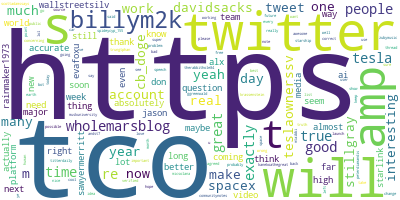

In [30]:
texts = df['processsed_text'].values.tolist()
words = list(sent_to_words(texts))
words = remove_stopwords(words) 

long_list = []
for text in words:
    long_list.extend(text)
long_list

long_string = ','.join(long_list)

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', collocations=False)

wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [31]:
id2word = corpora.Dictionary(words)
corpus = [id2word.doc2bow(text) for text in words]
num_topics = 20
lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics
)
LDAvis_prepared = pyLDAvis.gensim.prepare(
    lda_model, 
    corpus, 
    id2word
)
with open("LDA_vis_prep_2", 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17    -0.056404  0.008722       1        1  11.431761
6     -0.036302  0.004433       2        1   9.814585
16    -0.046740  0.010581       3        1   8.448110
3     -0.059487  0.028243       4        1   7.362156
15    -0.052534 -0.016759       5        1   6.880347
0     -0.041677 -0.032681       6        1   5.871521
13    -0.025119  0.016867       7        1   5.413959
10    -0.032424  0.025822       8        1   5.257838
9     -0.027628 -0.018906       9        1   4.824853
2     -0.024124  0.029165      10        1   4.635238
14    -0.015878  0.028052      11        1   4.559471
12     0.009040  0.010734      12        1   3.845304
4      0.048427 -0.024755      13        1   3.827173
7      0.023732 -0.037433      14        1   3.604537
1      0.024260 -0.053534      15        1   3.292558
11     0.015865  0.044252      16        1   2.938895
19     0.041244 -0.079458      17        1   2.444238
8      0.060137 -0.046062      18        1   2.130230
5      0.085361  0.008761      19        1   1.740699
18     0.110250  0.093957      20        1   1.676526, topic_info=      Term         Freq        Total Category  logprob  loglift
2        @  6413.000000  6413.000000  Default  30.0000  30.0000
19     the  1361.000000  1361.000000  Default  29.0000  29.0000
50      is  1110.000000  1110.000000  Default  28.0000  28.0000
122      :  1131.000000  1131.000000  Default  27.0000  27.0000
185  https  1081.000000  1081.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
217     an     3.746756   155.015399  Topic20  -5.7734   0.3658
156   from     3.675180   130.683591  Topic20  -5.7927   0.5173
85      be     3.944654   412.766589  Topic20  -5.7220  -0.5621
19     the     4.148000  1361.121000  Topic20  -5.6717  -1.7050
118   will     3.876134   391.788831  Topic20  -5.7395  -0.5274

[1509 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
789       1  0.102998     %
789       2  0.051499     %
789       3  0.077249     %
789       4  0.051499     %
789       6  0.128748     %
...     ...       ...   ...
3058     14  0.282902  🤷‍♂️
3058     20  0.282902  🤷‍♂️
9310     10  0.805408     🧀
9990     12  0.835907     🩸
9991     12  0.836136     🪶

[3937 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 7, 17, 4, 16, 1, 14, 11, 10, 3, 15, 13, 5, 8, 2, 12, 20, 9, 6, 19])

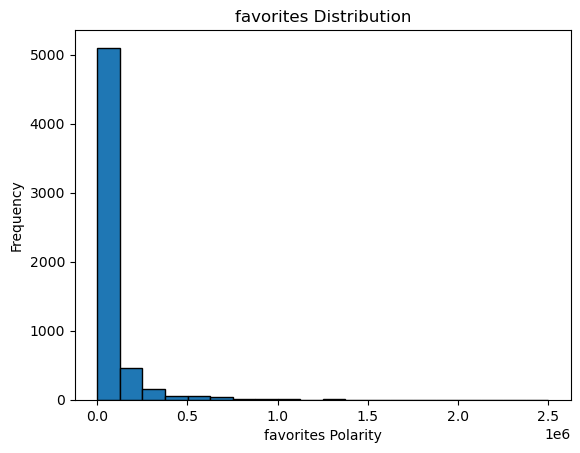

In [32]:
#favorites tweets distribution
plt.hist(df['favorites'], bins=20, edgecolor='black')
plt.title('favorites Distribution')
plt.xlabel('favorites Polarity')
plt.ylabel('Frequency')
plt.show()

In [33]:
len(words)

5904

In [34]:
words[0]

['@',
 'billym2k',
 'i',
 'find',
 'the',
 'gold',
 'toe',
 'sock',
 '–',
 'inevitably',
 'off',
 'kilter',
 '&',
 'amp',
 ';',
 'washed',
 'out',
 '–',
 'a',
 'little',
 'troubling',
 'esthetically',
 '&',
 'amp',
 ';',
 'arguably',
 'a',
 'bit',
 'corpo']

In [35]:
df.head()

id  user_name user_location           user_description  \
0  1544379368478212100  Elon Musk           NaN  Mars & Cars, Chips & Dips   
1  1544377493263720450  Elon Musk           NaN  Mars & Cars, Chips & Dips   
2  1544377130590552064  Elon Musk           NaN  Mars & Cars, Chips & Dips   
3  1544375575724400645  Elon Musk           NaN  Mars & Cars, Chips & Dips   
4  1544375148605853699  Elon Musk           NaN  Mars & Cars, Chips & Dips   

                user_created  user_followers  user_friends  user_favourites  \
0  2009-06-02 20:12:29+00:00       101240855           115            13503   
1  2009-06-02 20:12:29+00:00       101240806           115            13503   
2  2009-06-02 20:12:29+00:00       101240806           115            13503   
3  2009-06-02 20:12:29+00:00       101240806           115            13503   
4  2009-06-02 20:12:29+00:00       101240806           115            13503   

   user_verified                       date  \
0           True  2022-07-05 17:55:09+00:00   
1           True  2022-07-05 17:47:42+00:00   
2           True  2022-07-05 17:46:15+00:00   
3           True  2022-07-05 17:40:05+00:00   
4           True  2022-07-05 17:38:23+00:00   

                                                text hashtags  \
0  @BillyM2k I find the gold toe sock – inevitabl...      NaN   
1                 Sock Con, the conference for socks      NaN   
2  Always something new for the magazine cover an...      NaN   
3                   @ExplainThisBob This guy gets it      NaN   
4  Sock tech is so advanced that you can get pret...      NaN   

               source  retweets  favorites  is_retweet  \
0  Twitter for iPhone       335       6542       False   
1  Twitter for iPhone      1451      30753       False   
2  Twitter for iPhone      1284      28610       False   
3  Twitter for iPhone       131       3640       False   
4  Twitter for iPhone      1191      23790       False   

                                        cleaned_text  text_lenth  sentiment  \
0  i find gold toe sock inevit kilter amp wash li...          85  -0.093750   
1                               sock con confer sock          20   0.000000   
2  alway someth new magazin cover articl practic ...          51   0.136364   
3                         explainthisbob thi guy get          26   0.000000   
4  sock tech advanc get pretti much anyth sock fo...          52   0.300000   

                                     processsed_text  
0  @billym2k i find the gold toe sock – inevitabl...  
1                  sock con the conference for socks  
2  always something new for the magazine cover an...  
3                   @explainthisbob this guy gets it  
4  sock tech is so advanced that you can get pret...

In [36]:
#Convert to datetime
df["date"] = pd.to_datetime(df["date"])

In [37]:
df = df.groupby([df["date"].dt.date, "user_name"])[["retweets", "favorites"]].mean().astype(int)
df.head()

retweets  favorites
date       user_name                     
2022-07-05 Elon Musk      1476      30261
2022-07-06 Elon Musk      6888      90640
2022-07-07 Elon Musk      5213      75226
2022-07-08 Elon Musk      1718      20089
2022-07-11 Elon Musk      5284      81158

In [38]:
#add index
df = df.reset_index()
df.head()

date  user_name  retweets  favorites
0  2022-07-05  Elon Musk      1476      30261
1  2022-07-06  Elon Musk      6888      90640
2  2022-07-07  Elon Musk      5213      75226
3  2022-07-08  Elon Musk      1718      20089
4  2022-07-11  Elon Musk      5284      81158

<Axes: xlabel='date'>

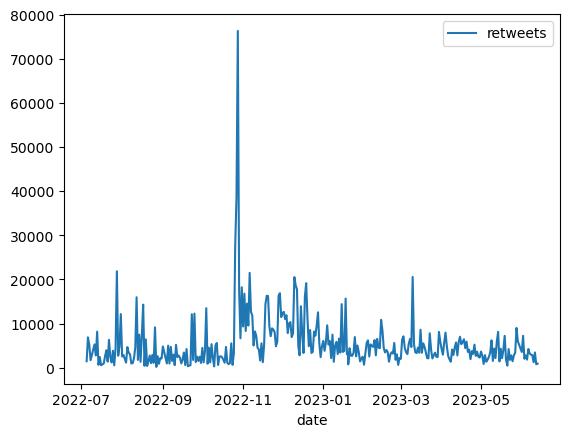

In [54]:
df.plot(x="date", y="retweets")

In [55]:
adfuller(df["favorites"])

(-6.158638080753031,
 7.26448107367162e-08,
 2,
 336,
 {'1%': -3.449962981927952,
  '5%': -2.870180642420163,
  '10%': -2.5713734527352607},
 7880.707512209882)

In [56]:
df.shape

(339, 5)

In [57]:
split = int(df.shape[0] * 0.8)

In [58]:
split

271

In [59]:
df_train = df[:split]
df_test = df[split:]

In [60]:
df_train.shape

(271, 5)

In [61]:
df_train.tail()

date  user_name  retweets  favorites     Diff
266  2023-03-31  Elon Musk      5893      57733 -22176.0
267  2023-04-01  Elon Musk      4269      55822  -1911.0
268  2023-04-02  Elon Musk      2955      33015 -22807.0
269  2023-04-03  Elon Musk      5734      80177  47162.0
270  2023-04-04  Elon Musk      7965      79407   -770.0

In [62]:
adfuller(df_train["favorites"])

(-6.770015917865062,
 2.6565072438384287e-09,
 1,
 269,
 {'1%': -3.4548957220044336,
  '5%': -2.8723451788613157,
  '10%': -2.572527778361272},
 6287.164051462287)

In [63]:
adfuller(df_train["favorites"].diff(1).dropna())

(-8.9850034521914,
 7.140317253636808e-15,
 7,
 262,
 {'1%': -3.455558114028747,
  '5%': -2.872635586277424,
  '10%': -2.572682677000175},
 6278.631974169673)

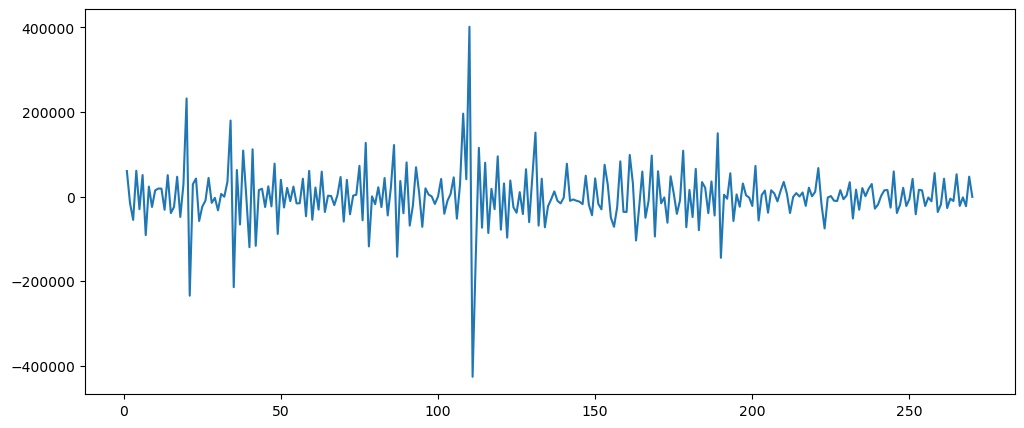

In [64]:
plt.figure(figsize= [12, 5])
plt.plot(df_train["favorites"].diff(1).dropna());

In [65]:
df["Diff"] = df_train["favorites"].diff(1)

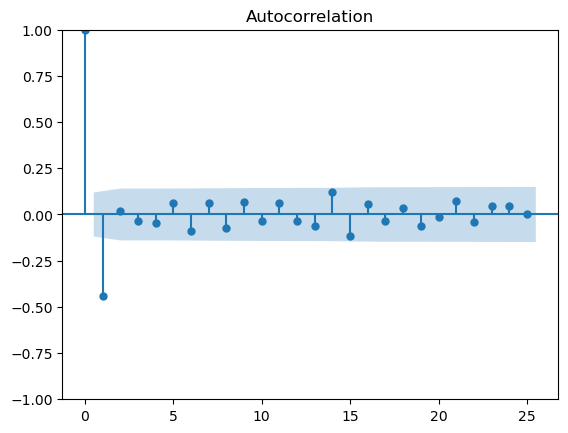

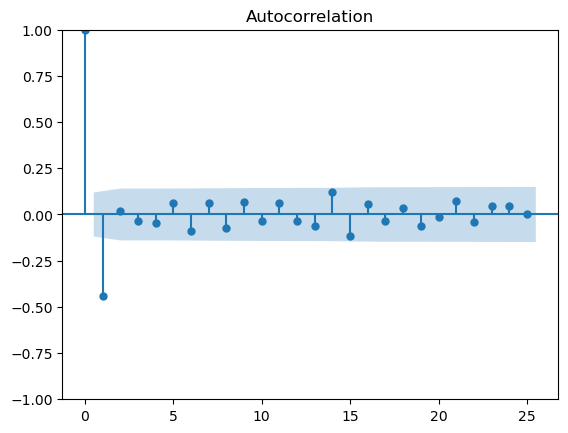

In [66]:
plot_acf(df["Diff"].dropna())

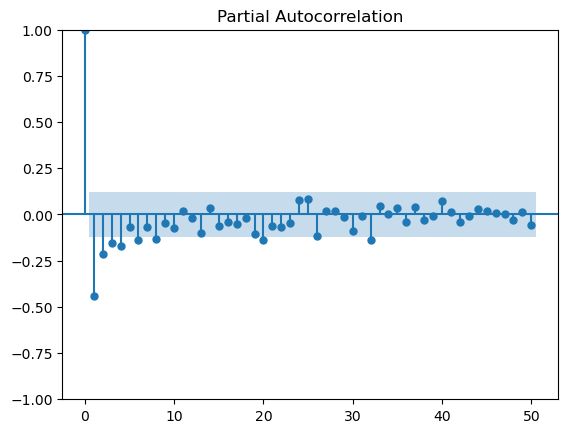

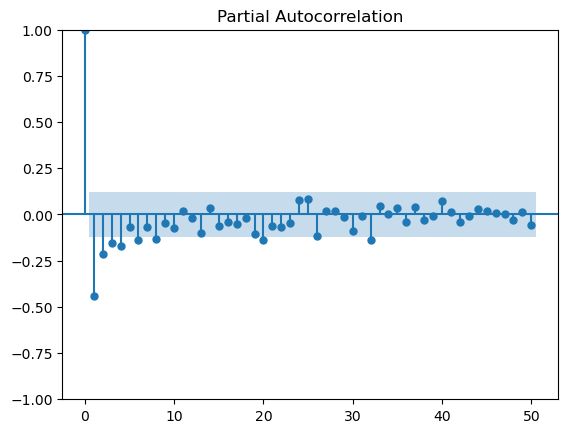

In [67]:
plot_pacf(df["Diff"].dropna(), method="ywm", lags=50)

In [68]:
#
aicVals = []

for p in range(5):
    for d in range(5):
        for q in range(5):
            print(f"p: {p}, d: {d}, q: {q}")
            
            try:
                model = pm.auto_arima(df["favorites"], suppress_warnings=True, seasonal=False, stepwise=True, order=(p, d, q))
                aicVals.append([model.aic(), p, d, q])
            except Exception as e:
                print(f"Error for p={p}, d={d}, q={q}: {e}")




p: 0, d: 0, q: 0
p: 0, d: 0, q: 1
p: 0, d: 0, q: 2
p: 0, d: 0, q: 3
p: 0, d: 0, q: 4
p: 0, d: 1, q: 0
p: 0, d: 1, q: 1
p: 0, d: 1, q: 2
p: 0, d: 1, q: 3
p: 0, d: 1, q: 4
p: 0, d: 2, q: 0
p: 0, d: 2, q: 1
p: 0, d: 2, q: 2
p: 0, d: 2, q: 3
p: 0, d: 2, q: 4
p: 0, d: 3, q: 0
p: 0, d: 3, q: 1
p: 0, d: 3, q: 2
p: 0, d: 3, q: 3
p: 0, d: 3, q: 4
p: 0, d: 4, q: 0
p: 0, d: 4, q: 1
p: 0, d: 4, q: 2
p: 0, d: 4, q: 3
p: 0, d: 4, q: 4
p: 1, d: 0, q: 0
p: 1, d: 0, q: 1
p: 1, d: 0, q: 2
p: 1, d: 0, q: 3
p: 1, d: 0, q: 4
p: 1, d: 1, q: 0
p: 1, d: 1, q: 1
p: 1, d: 1, q: 2
p: 1, d: 1, q: 3
p: 1, d: 1, q: 4
p: 1, d: 2, q: 0
p: 1, d: 2, q: 1
p: 1, d: 2, q: 2
p: 1, d: 2, q: 3
p: 1, d: 2, q: 4
p: 1, d: 3, q: 0
p: 1, d: 3, q: 1
p: 1, d: 3, q: 2
p: 1, d: 3, q: 3
p: 1, d: 3, q: 4
p: 1, d: 4, q: 0
p: 1, d: 4, q: 1
p: 1, d: 4, q: 2
p: 1, d: 4, q: 3
p: 1, d: 4, q: 4
p: 2, d: 0, q: 0
p: 2, d: 0, q: 1
p: 2, d: 0, q: 2
p: 2, d: 0, q: 3
p: 2, d: 0, q: 4
p: 2, d: 1, q: 0
p: 2, d: 1, q: 1
p: 2, d: 1, q: 2
p: 2, d: 1, q:

In [69]:
aicVals.sort()

In [70]:
aicVals

[[8286.933771937249, 0, 0, 0],
 [8286.933771937249, 0, 0, 1],
 [8286.933771937249, 0, 0, 2],
 [8286.933771937249, 0, 0, 3],
 [8286.933771937249, 0, 0, 4],
 [8286.933771937249, 0, 1, 0],
 [8286.933771937249, 0, 1, 1],
 [8286.933771937249, 0, 1, 2],
 [8286.933771937249, 0, 1, 3],
 [8286.933771937249, 0, 1, 4],
 [8286.933771937249, 0, 2, 0],
 [8286.933771937249, 0, 2, 1],
 [8286.933771937249, 0, 2, 2],
 [8286.933771937249, 0, 2, 3],
 [8286.933771937249, 0, 2, 4],
 [8286.933771937249, 0, 3, 0],
 [8286.933771937249, 0, 3, 1],
 [8286.933771937249, 0, 3, 2],
 [8286.933771937249, 0, 3, 3],
 [8286.933771937249, 0, 3, 4],
 [8286.933771937249, 0, 4, 0],
 [8286.933771937249, 0, 4, 1],
 [8286.933771937249, 0, 4, 2],
 [8286.933771937249, 0, 4, 3],
 [8286.933771937249, 0, 4, 4],
 [8286.933771937249, 1, 0, 0],
 [8286.933771937249, 1, 0, 1],
 [8286.933771937249, 1, 0, 2],
 [8286.933771937249, 1, 0, 3],
 [8286.933771937249, 1, 0, 4],
 [8286.933771937249, 1, 1, 0],
 [8286.933771937249, 1, 1, 1],
 [8286.9

In [71]:
model = SARIMAX(df_train["favorites"], order=(2, 1, 2), seasonal_order=(2, 1, 2,12)).fit()

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          favorites   No. Observations:                  271
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -3227.494
Date:                            Tue, 21 Nov 2023   AIC                           6472.987
Time:                                    00:59:59   BIC                           6504.964
Sample:                                         0   HQIC                          6485.845
                                            - 271                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7436      1.031     -0.721      0.471      -2.764       1.277
ar.L2          0.2136      0.311      0.687      0.492      -0.395       0.822
ma.L1          0.1145      1.019      0.112      0.911      -1.883       2.112
ma.L2         -0.8268      0.924     -0.895      0.371      -2.637       0.984
ar.S.L12      -0.3299      3.471     -0.095      0.924      -7.132       6.473
ar.S.L24       0.0259      0.523      0.049      0.961      -1.000       1.052
ma.S.L12      -0.6462      3.507     -0.184      0.854      -7.519       6.227
ma.S.L24      -0.1973      2.910     -0.068      0.946      -5.901       5.506
sigma2      6.847e+09   8.42e-09   8.13e+17      0.000    6.85e+09    6.85e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):              5479.16
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                             3.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.15e+34. Standard errors may be unstable.
"""

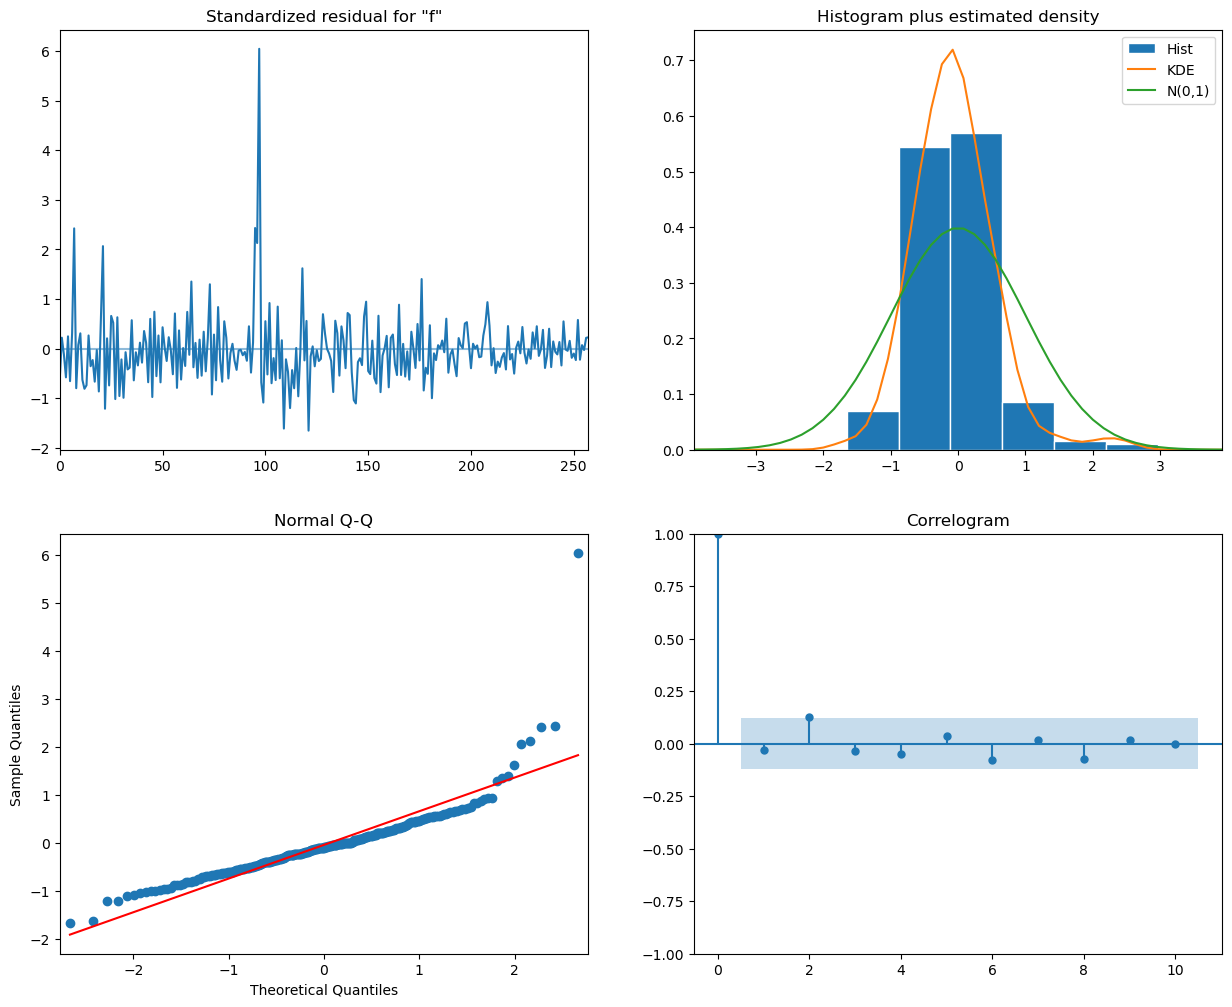

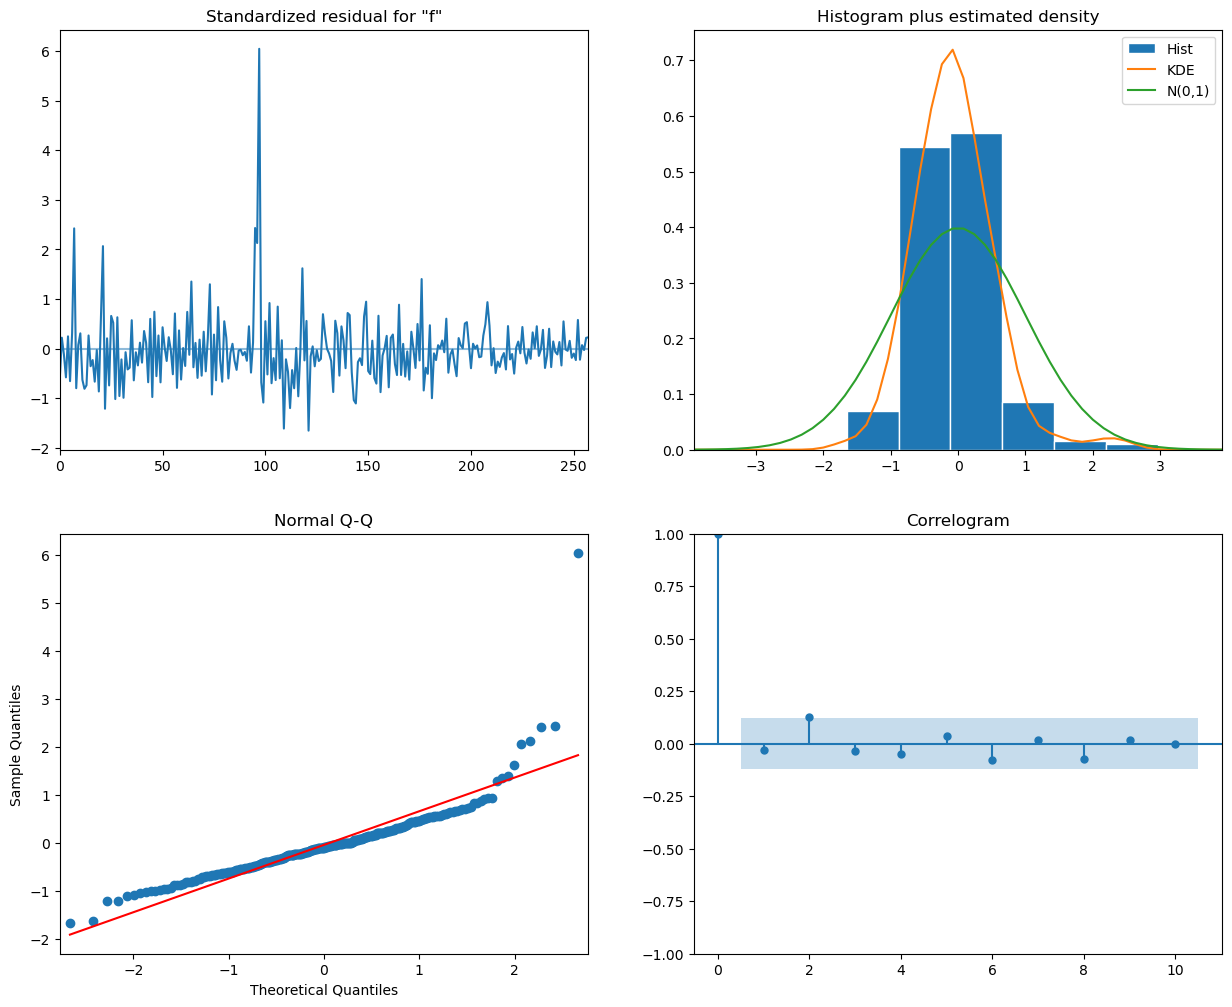

In [73]:
model.plot_diagnostics(figsize=(15, 12))

In [74]:
forecast_values = model.get_forecast(steps=(df.shape[0]-split))
forecast_ci = forecast_values.conf_int()

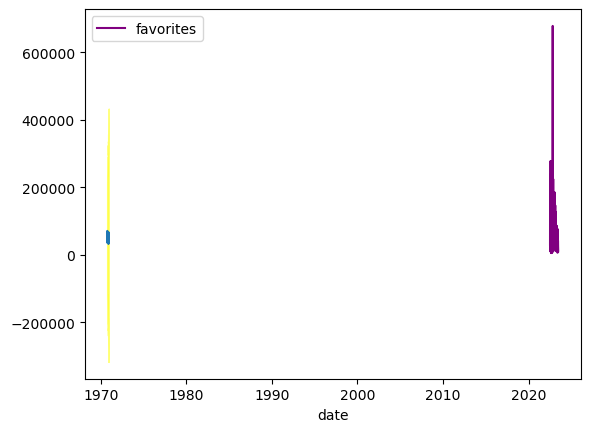

In [75]:
ax1 = df.plot(x="date", y="favorites", color="purple")

forecast_values.predicted_mean.plot(ax = ax1, label="Forecast")

ax1.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color="yellow",
    alpha=0.5
)

# Changing Model.Predict() to Model.Forecast()

In [78]:
pred_time = 20

results = model.forecast(pred_time)

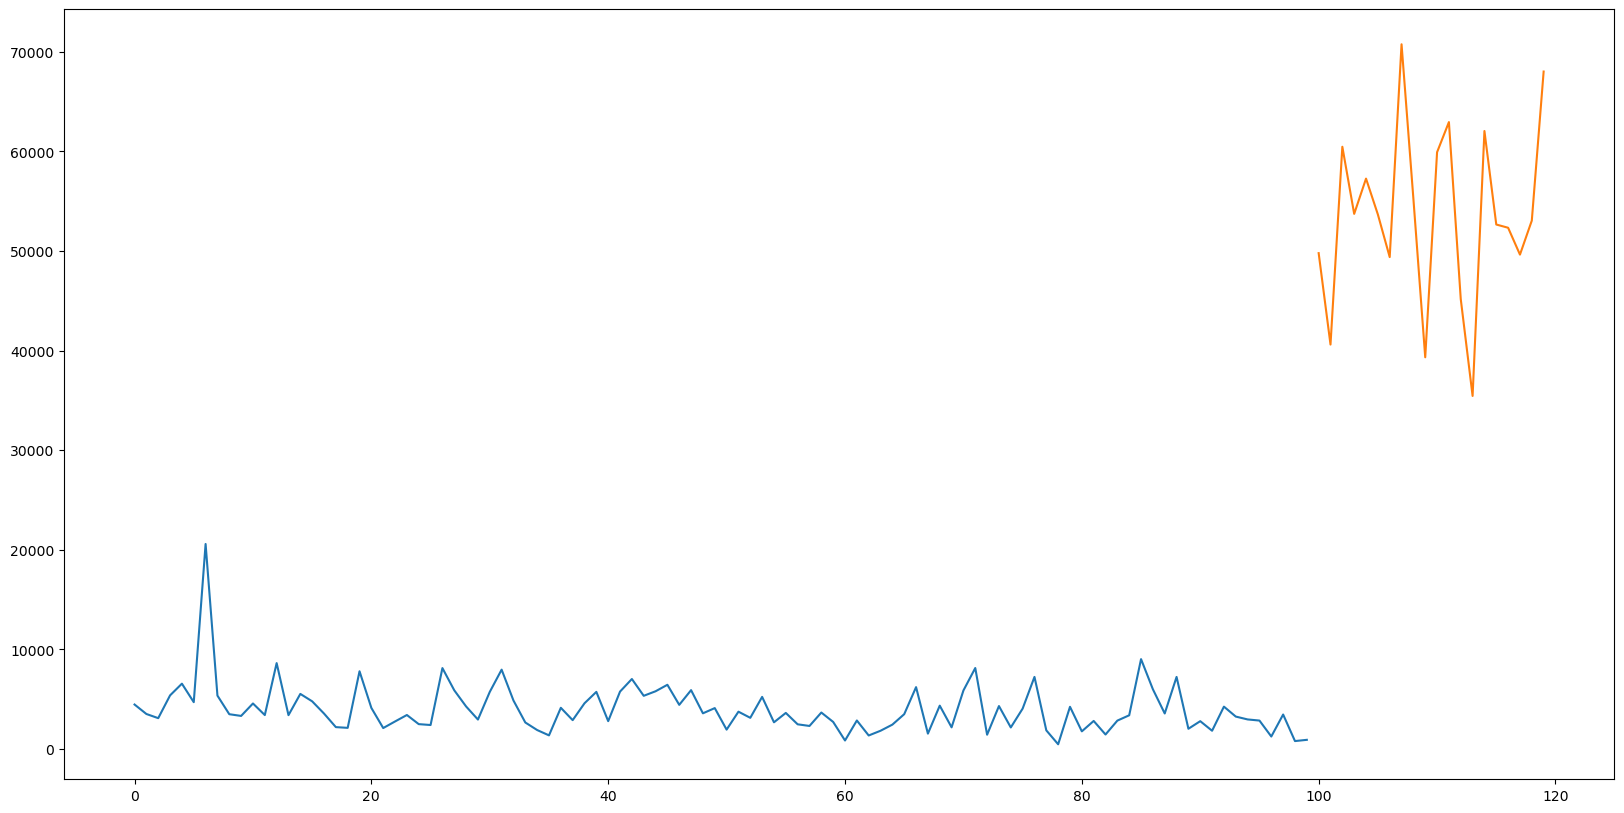

In [79]:
lagsDisplayed = 100

plt.figure(figsize=(20,10))
plt.plot(
    range(lagsDisplayed), 
    df["retweets"][-lagsDisplayed:]
)

plt.plot(
    range(lagsDisplayed, lagsDisplayed + pred_time), 
    results
);

In [80]:
model.predict(start=df["retweets"].shape[0]+10, end=df["retweets"].shape[0]+20)

349    46961.144831
350    64127.309510
351    50720.095024
352    33248.745806
353    58556.983896
354    58186.335173
355    40205.103384
356    31048.985286
357    55968.558063
358    47409.618930
359    48361.133220
Name: predicted_mean, dtype: float64

# Data Visualisation

In [81]:
df = pd.read_csv("elon_musk_tweets.csv")
df.head()

id  user_name user_location           user_description  \
0  1544379368478212100  Elon Musk           NaN  Mars & Cars, Chips & Dips   
1  1544377493263720450  Elon Musk           NaN  Mars & Cars, Chips & Dips   
2  1544377130590552064  Elon Musk           NaN  Mars & Cars, Chips & Dips   
3  1544375575724400645  Elon Musk           NaN  Mars & Cars, Chips & Dips   
4  1544375148605853699  Elon Musk           NaN  Mars & Cars, Chips & Dips   

                user_created  user_followers  user_friends  user_favourites  \
0  2009-06-02 20:12:29+00:00       101240855           115            13503   
1  2009-06-02 20:12:29+00:00       101240806           115            13503   
2  2009-06-02 20:12:29+00:00       101240806           115            13503   
3  2009-06-02 20:12:29+00:00       101240806           115            13503   
4  2009-06-02 20:12:29+00:00       101240806           115            13503   

   user_verified                       date  \
0           True  2022-07-05 17:55:09+00:00   
1           True  2022-07-05 17:47:42+00:00   
2           True  2022-07-05 17:46:15+00:00   
3           True  2022-07-05 17:40:05+00:00   
4           True  2022-07-05 17:38:23+00:00   

                                                text hashtags  \
0  @BillyM2k I find the gold toe sock – inevitabl...      NaN   
1                 Sock Con, the conference for socks      NaN   
2  Always something new for the magazine cover an...      NaN   
3                   @ExplainThisBob This guy gets it      NaN   
4  Sock tech is so advanced that you can get pret...      NaN   

               source  retweets  favorites  is_retweet  
0  Twitter for iPhone       335       6542       False  
1  Twitter for iPhone      1451      30753       False  
2  Twitter for iPhone      1284      28610       False  
3  Twitter for iPhone       131       3640       False  
4  Twitter for iPhone      1191      23790       False

In [82]:
df.describe()

id  user_followers  user_friends  user_favourites  \
count  5.904000e+03    5.904000e+03   5904.000000      5904.000000   
mean   1.618062e+18    1.265069e+08    192.918699     18717.950373   
std    3.259834e+16    1.186204e+07     67.569833      3673.085377   
min    1.544317e+18    1.012408e+08    115.000000     13503.000000   
25%    1.594339e+18    1.193263e+08    131.000000     15388.000000   
50%    1.619904e+18    1.283752e+08    178.000000     17883.000000   
75%    1.646781e+18    1.362687e+08    240.000000     21798.000000   
max    1.668435e+18    1.433260e+08    330.000000     25655.000000   

            retweets     favorites  
count    5904.000000  5.904000e+03  
mean     5504.126524  6.385289e+04  
std     14457.004070  1.326794e+05  
min         0.000000  5.200000e+01  
25%       350.750000  5.946500e+03  
50%      1092.000000  1.821300e+04  
75%      4213.250000  5.921225e+04  
max    359672.000000  2.500167e+06

In [83]:
#select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

user_name user_location           user_description  \
0  Elon Musk           NaN  Mars & Cars, Chips & Dips   
1  Elon Musk           NaN  Mars & Cars, Chips & Dips   
2  Elon Musk           NaN  Mars & Cars, Chips & Dips   
3  Elon Musk           NaN  Mars & Cars, Chips & Dips   
4  Elon Musk           NaN  Mars & Cars, Chips & Dips   

                user_created                       date  \
0  2009-06-02 20:12:29+00:00  2022-07-05 17:55:09+00:00   
1  2009-06-02 20:12:29+00:00  2022-07-05 17:47:42+00:00   
2  2009-06-02 20:12:29+00:00  2022-07-05 17:46:15+00:00   
3  2009-06-02 20:12:29+00:00  2022-07-05 17:40:05+00:00   
4  2009-06-02 20:12:29+00:00  2022-07-05 17:38:23+00:00   

                                                text hashtags  \
0  @BillyM2k I find the gold toe sock – inevitabl...      NaN   
1                 Sock Con, the conference for socks      NaN   
2  Always something new for the magazine cover an...      NaN   
3                   @ExplainThisBob This guy gets it      NaN   
4  Sock tech is so advanced that you can get pret...      NaN   

               source  
0  Twitter for iPhone  
1  Twitter for iPhone  
2  Twitter for iPhone  
3  Twitter for iPhone  
4  Twitter for iPhone

In [84]:
# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

user_name  user_location  user_description  user_created  date  text  \
0          0              6                 1             0     8   269   
1          0              6                 1             0     7  5417   
2          0              6                 1             0     6  4817   
3          0              6                 1             0     5   809   
4          0              6                 1             0     4  5418   

   hashtags  source  
0         2       1  
1         2       1  
2         2       1  
3         2       1  
4         2       1

In [85]:
# Convert object columns to category data type
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Convert int64 columns to float64
for col in df.select_dtypes(include=['int64']).columns:
    df[col] = df[col].astype('float64')
    
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes.astype('float64')    
    
print(df.dtypes)

id                  float64
user_name           float64
user_location       float64
user_description    float64
user_created        float64
user_followers      float64
user_friends        float64
user_favourites     float64
user_verified          bool
date                float64
text                float64
hashtags            float64
source              float64
retweets            float64
favorites           float64
is_retweet             bool
dtype: object


In [86]:
X = df.drop('favorites', axis=1)
y = df.favorites

In [87]:
lr = linear_model.LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)
r2 = r2_score(y, y_pred)
r2

0.8124052719658219

In [88]:
def get_regression_line(df):
    lr = linear_model.LinearRegression()
    lr.fit(X, y)
    coef = lr.coef_
    intercept = lr.intercept_

    scatter_plot = alt.Chart(df).mark_circle().encode(
        x='date',
        y='favorites',
        tooltip=['date', 'favorites'])

    line_plot = alt.Chart(pd.DataFrame({'date': [df['date'].min(), df['date'].max()],
                                         'favorites': [df['date'].min() * coef[0] + intercept,
                                                     df['date'].max() * coef[0] + intercept]})).mark_line(
        color='red').encode(
        x='date', y='favorites')

    return scatter_plot + line_plot

# Enable VegaFusion data transformer
alt.data_transformers.enable("vegafusion")


DataTransformerRegistry.enable('vegafusion')

In [89]:
get_regression_line(df)

alt.LayerChart(...)

Horizontal regression line suggest model is not capturing any significant relationship between favorites vs date

In [90]:
#Box Plot
def create_box_plot(df):
    df_long = df.melt(id_vars='date', var_name='key', value_name='value')
    df_long['date'] = df_long['date'].astype(float)
    df_long['value'] = df_long['value'].astype(float)
    
    return alt.Chart(df_long).mark_boxplot().encode(
        x=alt.X('key:N', title='Feature'),
        y=alt.Y('value:Q', title='Value'),
    ).interactive()

create_box_plot(df)


alt.Chart(...)

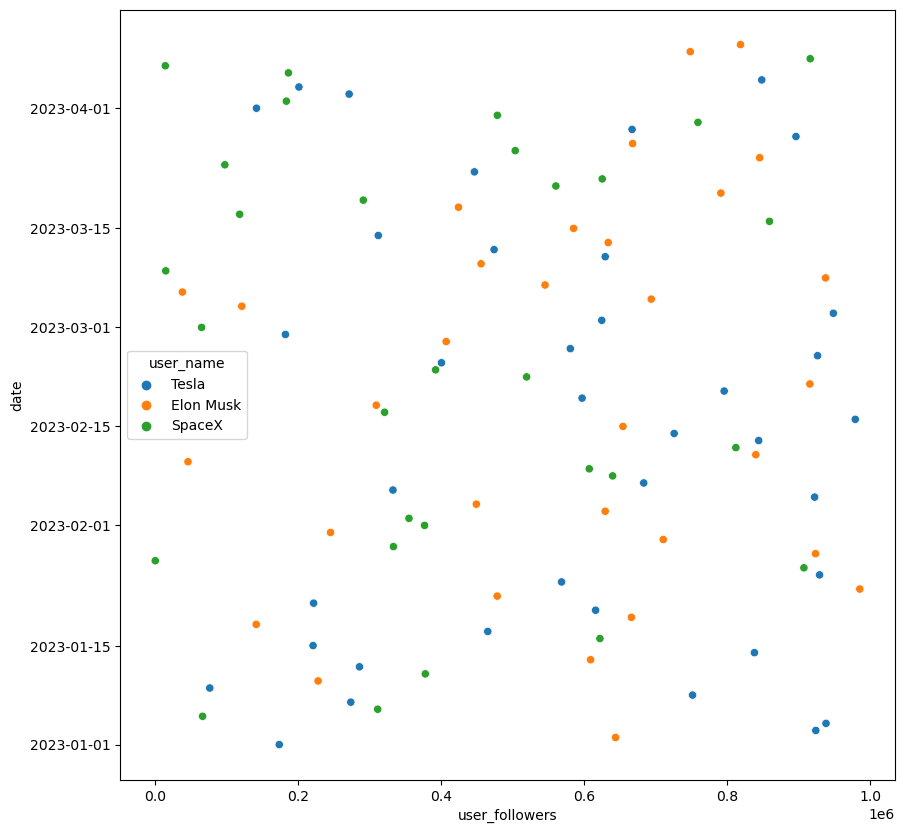

In [91]:
# Scatter plot
elon_musk_tweets = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'user_followers': np.random.randint(0, 1000000, 100),
    'user_name': np.random.choice(['Elon Musk', 'Tesla', 'SpaceX'], 100),
})

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x='user_followers', y='date', hue='user_name', data=elon_musk_tweets)
plt.show()


In [92]:
#nan values to numerical
df['favorites'] = pd.to_numeric(df['favorites'], errors='coerce')
df['retweets'] = pd.to_numeric(df['retweets'], errors='coerce')

# Drop rows with null values in 'favorites' or 'retweets'
df = df.dropna(subset=['favorites', 'retweets'])

scatter_plot = alt.Chart(df).mark_circle().encode(
    x='favorites:Q',
    y='retweets:Q',
    color='date:T',
    tooltip=['date:T', 'favorites:Q', 'retweets:Q']
).interactive()

scatter_plot


alt.Chart(...)

In [93]:

scatter_chart = alt.Chart(df).mark_circle().encode(
    x='favorites:Q',
    y='retweets:Q',
    color='user_description:N',
    tooltip=['id','user_name','user_location','user_description','user_created','user_followers','user_friends','user_favourites','user_verified','date','text','hashtags','source','retweets','favorites','is_retweet']
).interactive()

scatter_chart



alt.Chart(...)

# Dash Board

In [94]:

elon_musk_tweets = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'favorites': np.random.randint(0, 100, 10),
    'retweets': np.random.randint(0, 50, 10),
    'user_name': ['Elon Musk'] * 10,  
})

def update_plot(event):
    selected_user = user_dropdown.value
   
    print(f"Updating plot for user: {selected_user}")

# Convert the 'user_name' column to a list for the options parameter
user_options = elon_musk_tweets['user_name'].unique().tolist()

# Create a dropdown widget
user_dropdown = pn.widgets.Select(options=user_options, name='Select User')

# Heatmap
heatmap_data = pd.DataFrame({
    'x': elon_musk_tweets['date'],
    'y': elon_musk_tweets['favorites'],
    'color': elon_musk_tweets['retweets'],  
})

heatmap_pivoted = heatmap_data.pivot_table(index='y', columns='x', values='color', aggfunc='mean')
heatmap = px.imshow(heatmap_pivoted, title='Heatmap', color_continuous_scale='Viridis')
heatmap.update_layout(plot_bgcolor='#F2DFCE', paper_bgcolor='#F2DFCE') 


# Scatter plot
scatterplot_data = pd.DataFrame({
    'x': elon_musk_tweets['date'],
    'y': elon_musk_tweets['favorites'],
})

scatterplot = px.scatter(scatterplot_data, x='x', y='y', title='Scatter Plot')
scatterplot.update_layout(plot_bgcolor='#F2DFCE', paper_bgcolor='#F2DFCE') 

# Box plot
boxplot_data = pd.DataFrame({
    'x': elon_musk_tweets['date'],
    'y': elon_musk_tweets['favorites'],
})

boxplot = px.box(boxplot_data, x='x', y='y', title='Box Plot')
boxplot.update_layout(plot_bgcolor='#F2DFCE', paper_bgcolor='#F2DFCE') 

# Bar graph
bar_data = pd.DataFrame({
    'x': elon_musk_tweets['date'],
    'y': elon_musk_tweets['retweets'],
})

bar_graph = px.bar(bar_data, x='x', y='y', title='Bar Graph')
bar_graph.update_layout(plot_bgcolor='#F2DFCE', paper_bgcolor='#F2DFCE')  


# Define the layout of your dashboard
dashboard = pn.Column(
    pn.pane.Markdown('# Elon Musk Tweets Dashboard'),
    user_dropdown,
    heatmap,
   pn.pane.Plotly(scatterplot), 
    pn.pane.Plotly(boxplot),
    pn.pane.Plotly(bar_graph),
)


user_dropdown.param.watch(update_plot, 'value')


dashboard.show()




Launching server at http://localhost:63303


# References

In [ ]:
1. https://www.cct.ie/wp-content/themes/hdcct/img/atoms/logo.jpg
2.    